## 0. Quelques mots sur les environnements virtuels. 

**Qu'est-ce-qu'un environnement virtuel ?**


* *environnement virtuel* = espace isolé et autonome dans lequel vous pouvez installer des bibliothèques, des packages et des dépendances logicielles spécifiques à un projet sans affecter le système global de votre machine --> utile pour résoudre les problèmes de gestion des dépendances et garantir une isolation entre différents projets.

* *idée* = créer un espace de travail indépendant où vous pouvez installer les versions spécifiques de bibliothèques et d'outils nécessaires à votre projet, sans affecter le reste de votre système -> permet d'éviter les conflits de versions et assure que chaque projet peut fonctionner avec les dépendances exactes dont il a besoin.

**Avantages de conda dans un environnement virtuel ?**

1. *Gestion des dépendances* : Conda gère les dépendances de manière efficace, en installant les packages et en résolvant automatiquement les conflits. Cela simplifie la gestion des environnements et assure la compatibilité entre les packages.

2. *Environnements isolés* : Conda permet de créer des environnements virtuels isolés les uns des autres, ce qui signifie que les dépendances d'un projet n'interféreront pas avec celles d'un autre projet.

3. *Langages multiples* : Conda n'est pas spécifique à un langage de programmation particulier. Il peut être utilisé pour gérer les environnements virtuels pour des projets Python, R, Ruby, Lua, Scala, Java, JavaScript, C/C++, FORTRAN, et plus encore.

**Voici les commandes utilisées pour créer l'environnement virtuel**

- `git clone https://github.com/NailKhelifa/PyTorch_Personnal` : pour cloner ce repertoire

- `cd PyTorch_Personnal` : pour se diriger vers ce repertoire

- `conda create --name pytorch --file requirements.txt` : pour créer un environnement virtuel du nom de **pytorch**

- `conda list --export > requirements.txt` : pour mettre à jour requirements.txt

- `conda activate pytorch` : pour activer l'environnement virtuel 

- `conda list` : montre tous les packages et leur versions dans l'environnement virtuel

In [3]:
import torch
import numpy as np

## 1. Les tenseurs sur PyTorch

### 1.1. How to create a tensor 
* In PyTorch, everything is based on tensors operations. They are the equivalent arrays in NumPy. 

* Tensors can have multiple dimensions (1-D, 2-D, ...). To create an empty tensor use `torch.empty(size)` (for instance `torch.empty(1)` gives a scalar, `torch.empty(3)` gives a 1-D tensor with length 3, `torch.empty(2, 2, 2)` gives a 3-D tensor with length 2).

* Randomly initialized tensors with `torch.rand(size)`, tensors with ones `torch.ones(size)`, tensors with zero `torch.zeros(size)`

* We can specify the type of values in the tensor with `torch.rand(size, dtype=torch.int)`, `torch.rand(size, dtype=torch.float)`... 

* We can access the size of the tensor with `x.size` where `x` is a tensor

* We can create a tensor using a list `x = torch.tensor([2.5, 3])`


### 1.2. How to make operations on tensors

* We have element-wise operations using `z = x + y` or `z = torch.add(x, y)`

* Inplace operations 

In [4]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)

## element-wise addiiton
z = x + y
z = torch.add(x, y)
y.add_(x) # inplace

## element-wise subtraction
z = x - y
z = torch.subtract(x, y)
y.sub_(x) # inplace

## element-wise multiplication
z = x * y 
z = torch.mul(x, y)
y.mul_(x) # inplace

## element-wise division
z = x / y
z = torch.div(x, y)
y.div_(x) # inplace


tensor([[0.2570, 0.1259],
        [0.4248, 0.5054]])

There are also slicing operations as with lists and arrays in NumPy

In [5]:
x = torch.rand(5, 3)
print(x[:, 0])
print(x[1, 1].item()) ## prints the value. Beware -> works only if oyu have one element in your tensor

tensor([0.8098, 0.3649, 0.3341, 0.4643, 0.4791])
0.9479211568832397


We can reshape tensors

In [6]:
x = torch.rand(4, 4)
y = x.view(16) ## it changes the dimensions --> the number of elements must be the same
y = x.view(-1, 8) ## if we dont want to put the array in one dimension, we only specify the 
                  ## dimension of array and python will determine the rest (here 2 x 8)

How to convert from NumPy array to torch.tensor and the other way around

In [7]:
## from torch to numpy

a = torch.ones(6)
b = a.numpy() ## be careful with the parenthesis
 
## BE CAREFUL : if you work on the CPU and not the GPU, modifying b will also modify a because 
##              both objects share the same memory location

a.add_(1)
print(a, b) ## modifies both objects

## from numpy to torch 

a = np.ones(5)
b = torch.from_numpy(a)

a += 1
print(a, b)


tensor([2., 2., 2., 2., 2., 2.]) [2. 2. 2. 2. 2. 2.]
[2. 2. 2. 2. 2.] tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## 2. Gradient Calculation With Autograd

We here focus on the autograd package in pytorch and how we can calculate gradients with it. Gradients are essential for our optimization problems and this is a very useful tool. 

Pytorch already includes all the tools required to compute gradients with the package autograd.

Note the difference: 

* `torch.randn()`: generates random numbers from a uniform distribution between 0 (inclusive) and 1 (exclusive).

* `torch.rand()`: generates random numbers from a uniform distribution between 0 (inclusive) and 1 (exclusive).

We want to calculate the gradient of some functions with respect to x. We must specify the argument `requires_grad=True`. Whenever we make some computations with x, PyTorch will create a so-called computational graph for us. For instance, if we say `y = x + 2` PyTorch will create a computational graph such as: 

![Alt text](image.png)

With this graph and the concept of backpropagation, we can compute the gradient of some functions with respect to x. First, in the *forward pass* we calculate the output y and since we specified it requires the gradient, PyTorch will then create automatically a function for us which is later used in the *backpropagation phase* to get the gradients. Here y has an attribute `grad_fn` which will point to a gradient function called `AddBackward0` and with this function we can compute the gradient in the backward pass.

In [13]:
x = torch.randn(3, requires_grad=True)

y = x + 2 

print(y) ## we see the AddBackward0 function

z = y * y * 2 

print(z) ## MulBackward0 

z = z.mean()

print(c) ## MeanBackward0

## When we want to compute the gradients, we need to call c.backward()

z.backward() ## dz/dx -->THIS IS WHERE THERE IS THE VECTOR JACOBIAN PRODUCT, HERE WE DON'T SPECIFY ANY ARGUMENTS BECAUSE Z IS A SCALAR (see print nb 3)
print(x.grad) ## we have the gradients

tensor([0.1489, 2.8824, 3.2960], grad_fn=<AddBackward0>)
tensor([ 0.0443, 16.6169, 21.7279], grad_fn=<MulBackward0>)
tensor(19.5777, grad_fn=<MeanBackward0>)
tensor([0.1985, 3.8432, 4.3947])


One thing that we should also notice is that in the background, what it does is that it creates a so-called **vector jacobian product** that will look like this:

![Alt text](image-1.png)

We have the jacobian matrix with the partial derivatives and then we multiply it with the gradient vector to get the final gradient that we are interested in. This is called the **chain rule**. 

In [15]:
z = y * y * 2 ## here z is a vector...

print(z)

## ...thus, if we are to to the backward operation, we need to multiply it with a vector of same size

v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)

z.backward(v)

print(x.grad)

tensor([ 0.0443, 16.6169, 21.7279], grad_fn=<MulBackward0>)
tensor([ 0.3176, 26.9027,  4.4211])


Sometimes, we need to modify the `requires_grad` argument and there are three ways to do this (we assume that `x` is a `torch.tensor`)

- `x.requires_grad_(False)`: recall that whenever a method ends with a `_`, it modifies the object inplace
- `y = x.detach`: this creates a new vector with the same values but it doesn't requires the gradient
- `with torch.no_grad(): y = x + 2`: wrap everything in a with sequence

Finally, one last important thing is that whenever we call the `.backward()` function, then the gradient for this tensor will be accumulated in the `.grad` attribute. So the values will be summed up. We need to be careful. Here is a dummy example.

In [20]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3): ## we have two iterations, then the second iteration will accumulate the values in the `.grad` attribute
                       ## the values are summed up and this is wrong. Thus, before each iteration we must empty the gradient
    
    model_output = (weights*3).sum()
    
    model_output.backward()
    
    print(weights.grad)

    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


## 3. Backpropagation

In this section, we explain the famous backpropagation algorithm and how we can calculate gradients with it. 

The first concept we must know is the **chain rule**. Let's say we have two functions a and b. First we have the **input x**, then apply the **function a** which gives us the **output y** and we use this output as the input for our second **function b** which gives us the output **z**.

The idea is then to minimize the output **z**. For this, we need to compute the derivative of z with respect to the input x **dz/dx**. We use the so-called **chain rule**.

![Alt text](image-2.png)

The next concept is the so-called **computational graph**. For every operation we do with our tensors, PyTorch will create a graph for us where each at each node we apply one operation or one function with some inputs and get some outputs.

In this example, we multiply x and y and get a function f. At this node, we can compute so-called **local gradients** which we will use later in the chain rule to compute the final gradient. 

We can compute two gradients. In this case [f(x, y) = x*y], the local gradients are easy to compute. Why do we want them ? Because at the end of our graph we compute a Loss function that we want to minimize. 

If we suppose that we know the derivative of our loss function L with respect to the output z denoted **dL/dz**, we can compute our final gradient with the chain rule (see drawing).

![Alt text](image-3.png)



The whole concept consists of three steps:

1. Forward pass: Compute Loss

2. Compute local gradients

3. Backward pass: Compute dLoss/dWeights using the chain rule 

### Example: Linear Regression

We model our output with a linear combination of our input with some weights ($$\hat{y} = w \times x$$) and then we formulate our loss function (square error). The idea is to minimize the squared error with respect to our weights. We follow our three steps: 

1. We compute the loss

2. We compute the local gradients at each node of the computational graph

3. We start at the end, we have first our derivative of the loss with respect to s and then we go backward with the chain rule.

![Alt text](image-4.png)

Here is an example with numerical values: 

![Alt text](image-5.png)

Let's check the value with PyTorch:

In [24]:
x = torch.tensor(1.0) ## beware, put it float
y = torch.tensor(2.0)
w = torch.tensor(1., requires_grad=True) ## BEWARE, WE WANT TO MINIMIZE THE LOSS WITH RESPECT TO THE WEIGHTS SO WE ONLY NEED requires_grad=True FOR W 

## forward pass and compute loss
y_hat = x*w 
loss = (y_hat - y)**2

## backward pas
loss.backward()
print(w.grad)

#### update weights and iterate

tensor(-2.)


## 4. Gradient descent with autograd


We assume that the reader knows how linear regression and gradient descent work and build everything from scratch.

In [26]:
import numpy as np

## we assume the model is f(x) = 2 * x, i.e. the weights are here given by 2 

X = np.array([1, 2, 3, 4], dtype=np.float32) ## training sample 
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0 

## model prediction 

def forward(x): 
    return w * x

## loss

def loss(y, y_predicted):
    return ((y - y_predicted) ** 2).mean()

## gradient (computed by hand):
# MSE = 1/N * (w * x - y) ** 2
# dJ/dw = 1/N * 2 * x * (w * x - y)

def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted - y)

print(f"Prediction before training: f(5) = {forward(5):.3f}")

## training: 
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # Prediction = forward pass
    y_pred = forward(X)

    # Loss
    l = loss(Y, y_pred)
    
    # Gradients
    dw = gradient(X,Y, y_pred)

    # Update weights
    w -= learning_rate * dw ## update formula for the gradient descent algorithm

    if epoch % 1 == 0: ## we print every step
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')

print(f"Prediction after training: f(5) = {forward(5):.3f}")


Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314570
epoch 7: w = 1.997, loss = 0.00050332
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
epoch 11: w = 2.000, loss = 0.00000033
epoch 12: w = 2.000, loss = 0.00000005
epoch 13: w = 2.000, loss = 0.00000001
epoch 14: w = 2.000, loss = 0.00000000
epoch 15: w = 2.000, loss = 0.00000000
epoch 16: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 18: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
epoch 20: w = 2.000, loss = 0.00000000
epoch 21: w = 2.000, loss = 0.00000000
epoch 22: w = 2.000, loss = 0.00000000
epoch 23: w = 2.000, loss = 0.00000000
epoch 24: w = 2.000, loss = 0.00000000
epoch 25: w = 2.000, loss = 0.0

This is the implementation were we did everything manually. Now we compute the gradient using PyTorch, and we don't resort to numpy anymore.

In [29]:
import torch 

## we assume the model is f(x) = 2 * x, i.e. the weights are here given by 2 

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32) ## training sample 
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True) 

## model prediction 

def forward(x): 
    return w * x

## loss

def loss(y, y_predicted):
    return ((y - y_predicted) ** 2).mean()

print(f"Prediction before training: f(5) = {forward(5):.3f}")

## training: 
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # Prediction = forward pass
    y_pred = forward(X)

    # Loss
    l = loss(Y, y_pred)
    
    # Gradients = backward pass
    l.backward()

    # Update weights
    with torch.no_grad():
        w -= learning_rate * w.grad ## update formula for the gradient descent algorithm

    # Zero gradient
    w.grad.zero_()

    if epoch % 10 == 0: ## we print every step
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')


print(f"Prediction after training: f(5) = {forward(5):.3f}")


Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


## 5. Training Pipeline: Model, Loss, and Optimizer

In this section, we continue the previous example of linear regression but we compute loss and update parameters with PyTorch classes: 
![Alt text](image-6.png)

The general training pipeline in PyTorch is composed of three steps: 

1. Design the model (input size, output size, forward pass phase (define all the functions/layers)) 

2. Design the loss and the optimizer

3. Build the training loop: 
    1. Forward pass : compute the prediction 
    2. Backward pass : compute the gradients
    3. Update the weights and iterate until convergence

In the following code, we modified: 

- `import torch.nn as nn` which gives us the loss function 
- we don't define a routine for the loss function but instead we use .nn
- we don't update manually the weights according to the gradient descent but instead we use the `optimizer.step()`

In [30]:
import torch 
import torch.nn as nn ## neural network module

################# STEP 1: design the model, we assume the model is f(x) = 2 * x, i.e. the weights are here given by 2 

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32) ## training sample 
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True) 

## model prediction 

def forward(x): 
    return w * x

print(f"Prediction before training: f(5) = {forward(5):.3f}")

################### STEP 2: we don't define manually the loss anymore

## training: 
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate) ## stochastic gradient descent

for epoch in range(n_iters):
    # Prediction = forward pass
    y_pred = forward(X)

    # Loss
    l = loss(Y, y_pred)
    
    # Gradients = backward pass
    l.backward()

    # Update weights
    optimizer.step()

    # Zero gradient
    optimizer.zero_grad() ## we still need to empty the gradients

    if epoch % 10 == 0: ## we print every step
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')


print(f"Prediction after training: f(5) = {forward(5):.3f}")


Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


Then we will use completely PyTorch to run the complete pipeline:

![Alt text](image-7.png)

We now replace our manually implemented forward method with the PyTorch module. Thus we change: 

- We don't need the weights in the line `w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)` anymore because our PyTorch module knows the parameters

- We add `model = nn.Linear()`

- We modify the shape of our input and output parameters 

- We added some data to test our model: `X_test = torch.tensor([5], dtype=torch.float32)`

- Modify the optimizer parameters as we removed the weights in our code: `optimizer = torch.optim.SGD(model.parameters, lr=learning_rate) ## stochastic gradient descent`

- We defined our prediction by: `y_pred = model(X)`

In [35]:
import torch 
import torch.nn as nn ## neural network module

################# STEP 1: design the model, we assume the model is f(x) = 2 * x, i.e. the weights are here given by 2 

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32) ## training sample 
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape

input_size = n_features
output_size = n_features

## model prediction 

# model = nn.Linear(input_size, output_size) --> this work but we want to create a more general approach using a class

class LinearRegression(nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)

print(f"Prediction before training: f(5) = {model(X_test).item():.3f}")

################### STEP 2: we don't define manually the loss anymore

## training: 
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) ## stochastic gradient descent

for epoch in range(n_iters):
    # Prediction = forward pass
    y_pred = model(X)

    # Loss
    l = loss(Y, y_pred)
    
    # Gradients = backward pass
    l.backward()

    # Update weights
    optimizer.step()

    # Zero gradient
    optimizer.zero_grad() ## we still need to empty the gradients

    if epoch % 10 == 0: ## we print every step
        [w, b] = model.parameters()
        print(f'epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')


print(f"Prediction after training: f(5) = {model(X_test).item():.3f}")

Prediction before training: f(5) = -2.610
epoch 1: w = -0.012, loss = 50.82128143
epoch 11: w = 1.622, loss = 1.32085252
epoch 21: w = 1.887, loss = 0.03980955
epoch 31: w = 1.931, loss = 0.00633789
epoch 41: w = 1.939, loss = 0.00516294
epoch 51: w = 1.942, loss = 0.00484158
epoch 61: w = 1.944, loss = 0.00455924
epoch 71: w = 1.946, loss = 0.00429385
epoch 81: w = 1.947, loss = 0.00404393
epoch 91: w = 1.949, loss = 0.00380856
Prediction after training: f(5) = 9.897


## Linear Regression

In this section we construct the whole linear regression model from scratch using python. 

1. Design model (input, output size, forward pass)
2. Construct loss and optimizer
3. Training loop: 
- forward pass: compute prediction loss
- backward pass: gradients
- update weights

In [16]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 8.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.3/259.3 kB 5.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


epoch: 10, loss= 4343.0381
epoch: 20, loss= 3240.5144
epoch: 30, loss= 2443.0042
epoch: 40, loss= 1865.4977
epoch: 50, loss= 1446.8823
epoch: 60, loss= 1143.1592
epoch: 70, loss= 922.6050
epoch: 80, loss= 762.3188
epoch: 90, loss= 645.7469
epoch: 100, loss= 560.9104


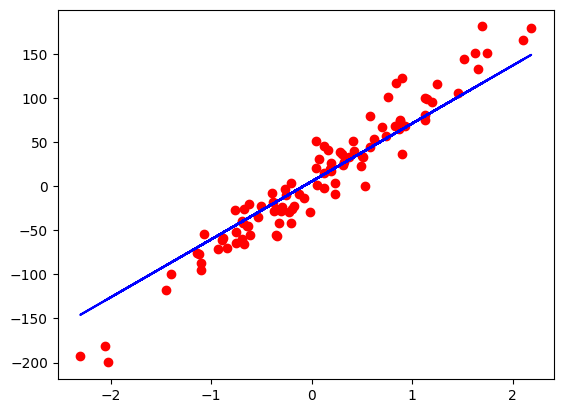

In [21]:
import torch 
import torch.nn as nn
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt


# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) ## we want to reshape our y because it has one row and we want to make it a column vector : 

## view is a built-in PyTorch method to reshape tensors
n_samples, n_features = X.shape

# 1) model : just one layer
input_size = n_features
output_size = 1 ## we just want one value for the prediction we make
model = nn.Linear(input_size, output_size)

# 2) optimizer and loss
criterion = nn.MSELoss() ## built-in optimization method
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) ## the arguments are the parameters we want to optimize and a learning rate

# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    ## we follow the three steps 

    # forward-pass: 
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    # we have to empty our gradients
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f"epoch: {epoch + 1 }, loss= {loss.item():.4f}")


# Plot
        
predicted = model(X).detach() ##.detach() generates a new tensor that sets the required_gradient algorithm to zero
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')

## 8. Logistic regression

1. Design model (input, output size, forward pass)
2. Construct loss and optimizer
3. Training loop: 
- forward pass: compute prediction loss
- backward pass: gradients
- update weights

Here is the binary cross entropy loss function: 

$$
\mathcal{L}_{BCE} = \frac{1}{N} \sum_{i=1}^n (Y_i \cdot \log(Y_i) + (1 - Y_i) \cdot \log(1-\hat{Y}_i))
$$

In [1]:
import torch 
import torch.nn as nn
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # separating between train and test split

# 0. Prepare the data

bc = datasets.load_breast_cancer() ## binary classification problem
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#scale 
sc = StandardScaler() # that will make our features have 0 mean and unit variance, THIS IS ALWAYS RECOMMENDED TO DO WHEN WE DEAL WITH LOGISTIC REGRESSION
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#convert the data to torch.tensor
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1) # we want to make it a column vector
y_test = y_test.view(y_test.shape[0], 1) # we want to make it a column vector

# 1. model: f=wx + b, sigmoid at the end
class LogisticRegression(nn.Module):

    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1) ## we create one layer using nn.Linear --> we want 1 output and give an input of size n_input 

    def forward(self, data):
        y_predicted = torch.sigmoid(self.linear(data))
        return y_predicted
    
model = LogisticRegression(n_features)

# 2. Loss and optimizer
learning_rate = 0.1
criterion = nn.BCELoss() # Binary Cross-Entropy
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3. Training loop

num_epochs = 100

for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)

    # backward pass
    loss.backward() ## PyTorch does all the computations for us

    # updates 
    optimizer.step()

    # zero gradients (because the .backward()) adds the gradients
    optimizer.zero_grad()

    if (epoch + 1) % 10 ==  0:
         print(f'epoch : {epoch + 1}, loss = {loss.item():.4f}')

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')

epoch : 10, loss = 0.2491
epoch : 20, loss = 0.1773
epoch : 30, loss = 0.1471
epoch : 40, loss = 0.1295
epoch : 50, loss = 0.1178
epoch : 60, loss = 0.1093
epoch : 70, loss = 0.1027
epoch : 80, loss = 0.0974
epoch : 90, loss = 0.0931
epoch : 100, loss = 0.0895
accuracy = 0.9298


## 9. Dataset and DataLoader - Batch training





## 11. Softmax and Cross Entropy

These are one of the most common functions used for neural networks. 

The formula of the softmax is the following: 

$$
S(y_i) = \frac{e^{y_i}}{\sum_{i=1}^n e^{y_i}}
$$

This function squashes the output to be between 0 and 1 so that we get probabilities. Let's take an example of a neural network of linear layer with three output values. These values are so-called **scores** or **logits** which are raw and after the softmax function, we get probabilities. 

![Alt text](image-9.png)

The highest logit has the highest probability. Here is the code

In [2]:
import torch 
import torch.nn as nn 
import numpy as np 

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print(outputs)

tensor([0.6590, 0.2424, 0.0986])


A lot of time, the softmax function is combined with the so-called **cross-entropy loss** function. This matress the performance of our classification model whose output is a probability between 0 and 1. The loss increases as the predicted probability diverges from the actual label. The better is our prediction, the lower is the loss. 

It is expressed as: 

$$
\mathcal{D}(L, \hat{L}) = - \frac{1}{N} \sum_{i=1}^n Y_i \cdot \log \hat{Y}_i
$$
Here is an example with a good prediction and a bad prediction:

![Alt text](image-10.png)

Here is the PyTorch code:

In [7]:
import torch 
import torch.nn as nn
import numpy as np

loss = nn.CrossEntropyLoss()

## In PyTorch, the loss function allows for multiple samples --> we can take 3 possible classes
y = torch.tensor([2, 0, 1]) ## 3 classes
# size : n_samples x n_classes
Y_pred_good = torch.tensor([ [0.5, 1.0, 2.0], [2.0, 0.7, 0.1], [0.7, 2.0, 0.6] ])
Y_pred_bad = torch.tensor([ [3.0, 1.0, 0.8], [0.8, 0.7, 2.], [1.0, 0.2, 3.0] ])

l1 = loss(Y_pred_good, y)
l2 = loss(Y_pred_bad, y)

print(l1.item())
print(l2.item()) 

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(predictions1)
print(predictions2)

0.41154685616493225
2.3508665561676025
tensor([2, 0, 1])
tensor([0, 2, 2])


![Alt text](image-11.png)

Let's see how a typical neural network looks like. Here is a simple neural network in a **multi-class** classification proble. Here we want to find out what animal the image shows. 

We have an input layers, then some hidden layers and maybe some **activation function** in between. Then at the end we have a **linear layer** with one output for each class. Here we have two outputs and then at the very end we apply our softmax and get the probabilities. 

![Alt text](image-12.png)

Let's see how the code looks like:

In [8]:
import torch 
import torch.nn as nn

## Multi-class problem

class NeuralNet2(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end because it is already coded in the cross-entropy loss function 
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss() # applies softmax

If we change slightly the architecture, we get:

![Alt text](image-13.png)

Notice that we use the sigmoid function here instead of the softmax !

In [9]:
import torch 
import torch.nn as nn

## Multi-class problem

class NeuralNet2(nn.Module):

    def __init__(self, input_size, hidden_size):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x): ## during this phase, we compute the prediction 
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end because it is already coded in the cross-entropy loss function 
        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet2(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss() # applies softmax

## 12. Activation function 

- What are activation functions?
- Why they are used?
- What different types of function there are
- How do we incorporate them in our PyTorch model?


**Activation function apply a non-linear transformation and decide whether a neuron should be activated or not**. Why do we use them? Why is a linear transformation not good enough? If we just apply linear transformations to our inputs, without activation functions, our network is just a stacked linear regression model. This linear model is not suited for a more complex task. With non-linear transformations in-between, our network can learn better and perform more complex tasks. After each layer, we typically want to apply this activation function so that our model can learn better.

![Alt text](image-14.png)

Here is a list of classic activation functions:
- Step function: 

$$
f(x) =  \left\{
  \begin{array}{ll}
    1 & \text{if   } x \geq \theta \\
    0 \text{        otherwise}
  \end{array}
\right.
$$

for a certain threshold $\theta$. It is not used in practice. 

- Sigmoid:

$$
f(x) = \frac{1}{1 + e^{-x}}
$$ 

It is typically used in the last layer of a binary classification problem.

- TanH - Hyperbolic tangent function:

$$
f(x) = \frac{2}{1 + e^{-2x}} - 1
$$ 

It is typically used in the hidden layers. It is a sort of scaled and shifted sigmoid function. It is a good choice in hidden layer that takes values in [$-1, 1$]

- ReLU function: 

$$
f(x) = max(0, x)
$$ 

It is the most popular choice in most of the networks. It will output 0 for negative values and the output for positive value. It doesn't look that different from a linear transformation but in fact it is non-linear and actually the most popular choice. **It is a good choice for activation function in hidden layers when you don't know what to use**.

- Leaky ReLU function: 

$$
f(x) =  \left\{
  \begin{array}{ll}
    x & \text{if  } x \geq 0 \\
    a \cdot x \text{        otherwise}
  \end{array}
\right.
$$

It is an improved version of the ReLu function and it tries to solve the vanishing gradient problem. Here **a is typically very small**. With a normal ReLu, our negative values are 0 and thus the gradient layer in the backpropagation is also set to zero and this means that these weights will never be update so the neurones associated to this value won't learn anything. We also say that these neurons are dead. This is when you use the leaky ReLu. 

- Softmax: 

$$
S(y_i) = \frac{e^{y_i}}{\sum_{i=1}^n e^{y_i}}
$$

This function squashes the output to be between 0 and 1 so that we get probabilities. It is a good choice in the last layer of a multi-class classification problem.

Let's jump into the code now:

In [10]:
## option 1: create nn Modules
class NeuralNet2(nn.Module):

    def __init__(self, input_size, hidden_size):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x): ## during this phase, we compute the prediction 
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

## option 2 (use activation functions directly in forward pass):
    
class NeuralNet2(nn.Module):

    ## we only define the linear layers in the init function
    def __init__(self, input_size, hidden_size):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x): ## during this phase, we compute the prediction 
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out